In [3]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib as mpl
from scipy import signal
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from os import path
import datain
import time

In [4]:
fpath=r'G:\My Drive\UW Research\fr-XAS July 2018\Data\XANES+Line Scans'

dat_files=glob.glob(fpath+ '\Co[0-9][0-9]_[0-9]*.csv')

dat_files
data1=np.array(pd.read_csv(dat_files[0],delimiter=',',engine='python',skiprows=37))[:,15:21]
data2=np.array(pd.read_csv(dat_files[1],delimiter=',',engine='python',skiprows=37))[:,15:21]
data3=np.array(pd.read_csv(dat_files[2],delimiter=',',engine='python',skiprows=37))[:,15:21]

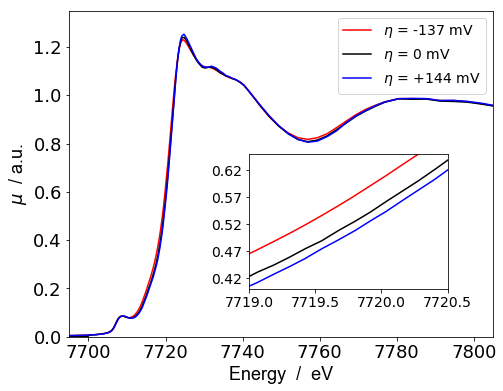

In [5]:
title_font = {'fontname':'Arial', 'size':'18', 'color':'black', 'weight':'normal'}


fig=plt.figure(constrained_layout=False,figsize=(8,6))
gs=fig.add_gridspec(7,20)
f_ax1=fig.add_subplot(gs[:,:-1])
f_ax1.plot(data2[:,0],data2[:,1],color=(1,0,0),linestyle='-',marker='',label=str('$\eta$ = -137 mV'))
f_ax1.plot(data1[:,0],data1[:,1],color=(0,0,0),linestyle='-',marker='',label=str('$\eta$ = 0 mV'))
f_ax1.plot(data3[:,0],data3[:,1],color=(0,0,1),linestyle='-',marker='',label=str('$\eta$ = +144 mV'))
f_ax1.set_xlim(7695,7805)
f_ax1.xaxis.set_major_locator(ticker.IndexLocator(base=20,offset=20))
f_ax1.set_ylim(0,1.35)
f_ax1.set_ylabel(r'$\mu$  / a.u.',**title_font)
f_ax1.set_xlabel(r'Energy  /  eV',**title_font)
f_ax1.legend(fontsize=14)
f_ax1.tick_params(axis='both',labelsize=18)


f_ax2=fig.add_subplot(gs[3:-1,8:-3]) 
f_ax2.plot(data2[:,0],data2[:,1],color=(1,0,0),linestyle='-',marker='',label=str('-137 mV \eta'))
f_ax2.plot(data1[:,0],data1[:,1],color=(0,0,0),linestyle='-',marker='',label=str('OCV'))
f_ax2.plot(data3[:,0],data3[:,1],color=(0,0,1),linestyle='-',marker='',label=str('+144 mV \eta'))
f_ax2.set_xlim(7719,7720.5)
f_ax2.set_ylim(.4,.65)
f_ax2.xaxis.set_major_locator(ticker.MultipleLocator(.5))
f_ax2.yaxis.set_major_locator(ticker.IndexLocator(base=.05,offset=.022))
f_ax2.tick_params(axis='both',labelsize=14)

plt.show()

# plt.savefig('1% O2 XANES.png',bbox_inches='tight',dpi=400,format='png')

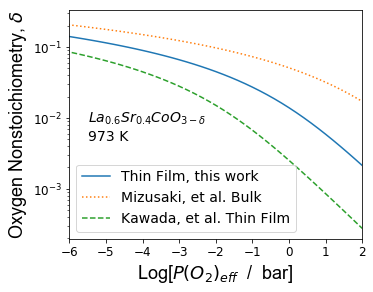

In [6]:
filestr=fpath=r'G:\My Drive\UW Research\fr-XAS July 2018\Data\Versastat\Nonstoichiometry values.csv'

datadelta=np.array(pd.read_csv(filestr,delimiter=',',engine='python',skiprows=5))

fig=plt.figure(constrained_layout=False,figsize=(5.25,4.2))
ax1=fig.add_subplot(111)
ax1.plot(datadelta[:,0],datadelta[:,1],label=str('Thin Film, this work'))
ax1.plot(datadelta[:,0],datadelta[:,5],':',label=str('Mizusaki, et al. Bulk'))
ax1.plot(datadelta[:,0],datadelta[:,7],'--',label=str('Kawada, et al. Thin Film'))
ax1.set_xlabel(r'Log[$P(O_2)_{eff}$  /  bar]',**title_font)
ax1.set_ylabel(r'Oxygen Nonstoichiometry, $\delta$', **title_font)
ax1.set_xlim(-6,2)
ax1.legend(fontsize=14)
ax1.tick_params(axis='both',labelsize=12)
ax1.text(-5.5,.005,'$La_{0.6}Sr_{0.4}CoO_{3-\delta}$ \n973 K',fontsize=14)
plt.yscale("log")

# ax1.plot(datadelta[8:137,0]*1000,datadiff[8:137,5],label=str('$\eta$ = +142 mV'),color=(0,0,1))
# ax1.set_xlim(7700,7735)
# ax1.set_ylim(-.02,.02)
# ax1.set_ylabel(r'$\mu_\eta$ - $\mu_{OCV}$  / a.u.',**title_font)
# ax1.set_xlabel(r'Energy  /  eV',**title_font)
# ax1.tick_params(axis='both',labelsize=14)
# ax1.xaxis.set_major_locator(None)
# ax1.legend(fontsize=14)

plt.show()
# plt.savefig('Nonstoichiometry.png',dpi=400,bbox_inches='tight',format='png')

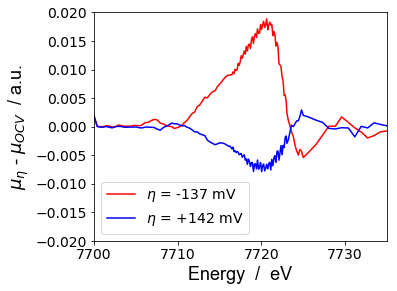

In [7]:
filestr=fpath=r'G:\My Drive\UW Research\fr-XAS July 2018\Data\XANES+Line Scans\1% O2 Differences.csv'

datadiff=np.array(pd.read_csv(filestr,delimiter=',',engine='python',skiprows=0))

fig=plt.figure(constrained_layout=False,figsize=(5.25,4.2))
ax1=fig.add_subplot(111)
ax1.plot(datadiff[8:137,0]*1000,datadiff[8:137,4],label=str('$\eta$ = -137 mV'),color=(1,0,0))
ax1.plot(datadiff[8:137,0]*1000,datadiff[8:137,5],label=str('$\eta$ = +142 mV'),color=(0,0,1))
ax1.set_xlim(7700,7735)
ax1.set_ylim(-.02,.02)
ax1.set_ylabel(r'$\mu_\eta$ - $\mu_{OCV}$  / a.u.',**title_font)
ax1.set_xlabel(r'Energy  /  eV',**title_font)
ax1.tick_params(axis='both',labelsize=14)
# ax1.xaxis.set_major_locator(ticker.IndexLocator(base=10,offset=4))
ax1.legend(fontsize=14)

plt.show()
# plt.savefig('1% O2 Differences.png',dpi=400,bbox_inches='tight',format='png')